In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/transformed_data.csv',index_col=0)

## number of instances vs time (of the year)

In [15]:
#number of instances over the years
data.year.value_counts().sort_index()

2013     2702
2014    11179
2015    11481
2016     1367
Name: year, dtype: int64

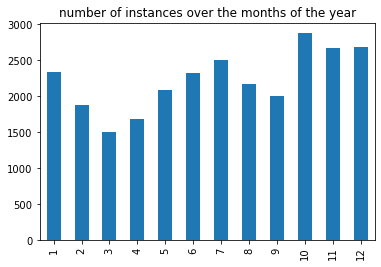

In [56]:
#number of instances over the months (aggregated)
plt.title('number of instances over the months of the year')
data.month.value_counts().sort_index().plot.bar()
plt.show()

## rates of different outcomes (also over time)

In [59]:
#counts of the different outcomes
data.OutcomeType.value_counts().sort_index()

Adoption           10769
Died                 197
Euthanasia          1555
Return_to_owner     4786
Transfer            9422
Name: OutcomeType, dtype: int64

In [57]:
#now we will see how the share of different outcomes change with the month of the year

In [54]:
share_of_outcomes = np.zeros((12,5))
outcomes = data.OutcomeType.unique()
outcomes.sort()

for m in range(1,13):
    share_of_outcomes[m-1] = data[data.month == m].OutcomeType.value_counts().sort_index()
    share_of_outcomes[m-1] = share_of_outcomes[m-1]/np.sum(share_of_outcomes[m-1])

share_of_outcomes = share_of_outcomes.T

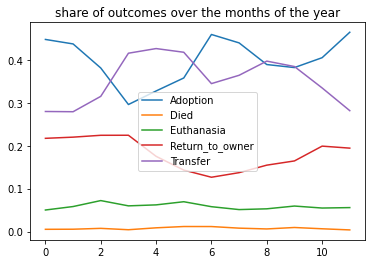

In [58]:
plt.title('share of outcomes over the months of the year')
for i in range(5):
    plt.plot(share_of_outcomes[i], label = outcomes[i])
plt.legend()
plt.show()

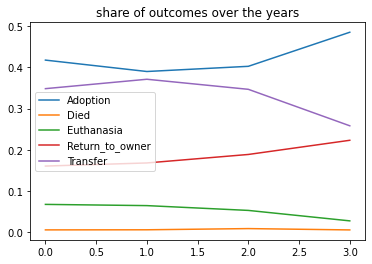

In [61]:
#now the same over the years
share_of_outcomes = np.zeros((4,5))
outcomes = data.OutcomeType.unique()
outcomes.sort()

for y in [2013,2014,2015,2016]:
    share_of_outcomes[y-2013] = data[data.year == y].OutcomeType.value_counts().sort_index()
    share_of_outcomes[y-2013] = share_of_outcomes[y-2013]/np.sum(share_of_outcomes[y-2013])

share_of_outcomes = share_of_outcomes.T

plt.title('share of outcomes over the years')
for i in range(5):
    plt.plot(share_of_outcomes[i], label = outcomes[i])
plt.legend()
plt.show()

Here we have a kind of nice insight that the rates of adoption and return to owner increase over the years, but the rate of transfer decreases over the years.

## age distribution

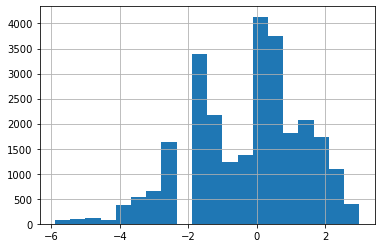

In [86]:
data[data.AgeuponOutcome != 0].AgeuponOutcome.apply(np.log).hist(bins=20)
plt.show()

## outcomes vs. sex and neutralization

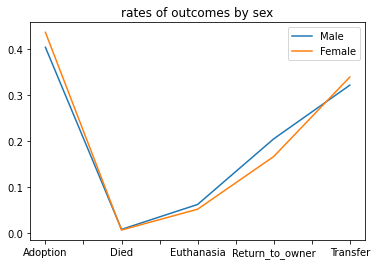

In [81]:
#plot outcomes in relation to the sex
for s in ['Male','Female']:
    data_ = data[data.SexuponOutcome == s]
    l = len(data_)
    v = data_.OutcomeType.value_counts().sort_index().apply(lambda x: x/l)
    v.plot(label = s)
plt.title('rates of outcomes by sex')
plt.legend()
plt.show()

seems like there are only minor differences

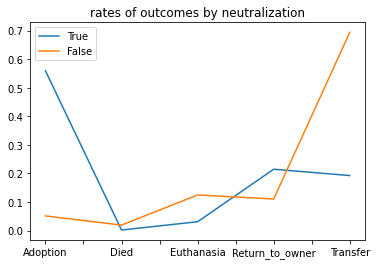

In [83]:
#plot outcomes in relation to neutralization
for s in [True,False]:
    data_ = data[data.neutralized == s]
    l = len(data_)
    v = data_.OutcomeType.value_counts().sort_index().apply(lambda x: x/l)
    v.plot(label = s)
plt.title('rates of outcomes by neutralization')
plt.legend()
plt.show()

Now thats interesting!

## outcomes for dog vs. cat

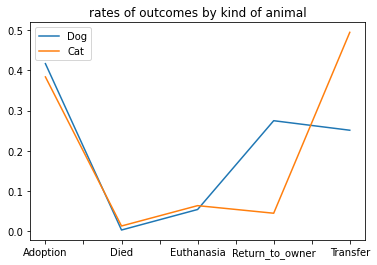

In [85]:
#plot outcomes in relation to the kind of animal
for s in ['Dog','Cat']:
    data_ = data[data.AnimalType == s]
    l = len(data_)
    v = data_.OutcomeType.value_counts().sort_index().apply(lambda x: x/l)
    v.plot(label = s)
plt.title('rates of outcomes by kind of animal')
plt.legend()
plt.show()

This also seems interesting!